# Queueing theory - Testing notebook

In [1]:
def occupancy_to_waitingfactor(utilisation=.3, nr_of_servers_to_chk=4, poly_order=6, kendall='E2/E2/n'):
    """Waiting time factor (E2/E2/n or M/E2/n) queueing theory using 6th order polynomial regression)"""

    if kendall == 'E2/E2/n':
        # Create dataframe with data from Groenveld (2007) - Table V
        # See also PIANC 2014 Table 6.2
        utilisations = np.array([.1, .2, .3, .4, .5, .6, .7, .8, .9])
        nr_of_servers = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
        data = np.array([
            [0.0166, 0.0006, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
            [0.0604, 0.0065, 0.0011, 0.0002, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
            [0.1310, 0.0235, 0.0062, 0.0019, 0.0007, 0.0002, 0.0001, 0.0000, 0.0000, 0.0000],
            [0.2355, 0.0576, 0.0205, 0.0085, 0.0039, 0.0019, 0.0009, 0.0005, 0.0003, 0.0001],
            [0.3904, 0.1181, 0.0512, 0.0532, 0.0142, 0.0082, 0.0050, 0.0031, 0.0020, 0.0013],
            [0.6306, 0.2222, 0.1103, 0.0639, 0.0400, 0.0265, 0.0182, 0.0128, 0.0093, 0.0069],
            [1.0391, 0.4125, 0.2275, 0.1441, 0.0988, 0.0712, 0.0532, 0.0407, 0.0319, 0.0258],
            [1.8653, 0.8300, 0.4600, 0.3300, 0.2300, 0.1900, 0.1400, 0.1200, 0.0900, 0.0900],
            [4.3590, 2.0000, 1.2000, 0.9200, 0.6500, 0.5700, 0.4400, 0.4000, 0.3200, 0.3000]
        ])

    elif kendall == 'M/E2/n':
        # Create dataframe with data from Groenveld (2007) - Table IV
        # See also PIANC 2014 Table 6.1
        utilisations = np.array([.1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9])
        nr_of_servers = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
        data = np.array([
            [0.08, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.13, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.19, 0.03, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.25, 0.05, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.32, 0.08, 0.03, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.40, 0.11, 0.04, 0.02, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.50, 0.15, 0.06, 0.03, 0.02, 0.01, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.60, 0.20, 0.08, 0.05, 0.03, 0.02, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
            [0.75, 0.26, 0.12, 0.07, 0.04, 0.03, 0.02, 0.01, 0.01, 0.01, 0.00, 0.00, 0.00, 0.00],
            [0.91, 0.33, 0.16, 0.10, 0.06, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.00, 0.00],
            [1.13, 0.43, 0.23, 0.14, 0.09, 0.06, 0.05, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01],
            [1.38, 0.55, 0.30, 0.19, 0.12, 0.09, 0.07, 0.05, 0.04, 0.03, 0.03, 0.02, 0.02, 0.02],
            [1.75, 0.73, 0.42, 0.27, 0.19, 0.14, 0.11, 0.09, 0.07, 0.06, 0.05, 0.04, 0.03, 0.03],
            [2.22, 0.96, 0.59, 0.39, 0.28, 0.21, 0.17, 0.14, 0.12, 0.10, 0.08, 0.07, 0.06, 0.05],
            [3.00, 1.34, 0.82, 0.57, 0.42, 0.33, 0.27, 0.22, 0.18, 0.16, 0.13, 0.11, 0.10, 0.09],
            [4.50, 2.00, 1.34, 0.90, 0.70, 0.54, 0.46, 0.39, 0.34, 0.30, 0.26, 0.23, 0.20, 0.18],
            [6.75, 3.14, 2.01, 1.45, 1.12, 0.91, 0.76, 0.65, 0.56, 0.50, 0.45, 0.40, 0.36, 0.33]
        ])

    df = pd.DataFrame(data, index=utilisations, columns=nr_of_servers)

    # Create a 6th order polynomial fit through the data (for nr_of_stations_chk)
    target = df.loc[:, nr_of_servers_to_chk]
    p_p = np.polyfit(target.index, target.values, poly_order)

    waiting_factor = np.polyval(p_p, utilisation)
    # todo: when the nr of servers > 10 the waiting factor should be set to inf (definitively more equipment needed)

    # Return waiting factor
    return waiting_factor


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openqtsim

In [7]:
utilisations = np.array([.1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9])
nr_of_servers = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
data = np.array([
    [0.08, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.13, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.19, 0.03, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.25, 0.05, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.32, 0.08, 0.03, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.40, 0.11, 0.04, 0.02, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.50, 0.15, 0.06, 0.03, 0.02, 0.01, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.60, 0.20, 0.08, 0.05, 0.03, 0.02, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.75, 0.26, 0.12, 0.07, 0.04, 0.03, 0.02, 0.01, 0.01, 0.01, 0.00, 0.00, 0.00, 0.00],
    [0.91, 0.33, 0.16, 0.10, 0.06, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.00, 0.00],
    [1.13, 0.43, 0.23, 0.14, 0.09, 0.06, 0.05, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01],
    [1.38, 0.55, 0.30, 0.19, 0.12, 0.09, 0.07, 0.05, 0.04, 0.03, 0.03, 0.02, 0.02, 0.02],
    [1.75, 0.73, 0.42, 0.27, 0.19, 0.14, 0.11, 0.09, 0.07, 0.06, 0.05, 0.04, 0.03, 0.03],
    [2.22, 0.96, 0.59, 0.39, 0.28, 0.21, 0.17, 0.14, 0.12, 0.10, 0.08, 0.07, 0.06, 0.05],
    [3.00, 1.34, 0.82, 0.57, 0.42, 0.33, 0.27, 0.22, 0.18, 0.16, 0.13, 0.11, 0.10, 0.09],
    [4.50, 2.00, 1.34, 0.90, 0.70, 0.54, 0.46, 0.39, 0.34, 0.30, 0.26, 0.23, 0.20, 0.18],
    [6.75, 3.14, 2.01, 1.45, 1.12, 0.91, 0.76, 0.65, 0.56, 0.50, 0.45, 0.40, 0.36, 0.33]
])

df = pd.DataFrame(data, index=utilisations, columns=nr_of_servers)

In [8]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0.10,0.08,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.15,0.13,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.20,0.19,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.25,0.25,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.30,0.32,0.08,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.35,0.40,0.11,0.04,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.40,0.50,0.15,0.06,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.45,0.60,0.20,0.08,0.05,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.50,0.75,0.26,0.12,0.07,0.04,0.03,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.00
0.55,0.91,0.33,0.16,0.10,0.06,0.04,0.03,0.02,0.02,0.01,0.01,0.01,0.00,0.00


In [9]:
# utilisation = .85
# nr_of_servers_to_chk = 1
poly_order = 6

In [13]:
factor = openqtsim.lookup_tables.occupancy_to_waitingfactor(utilisation=.82, nr_of_servers_to_chk=2, poly_order=6, kendall='M/E2/n')

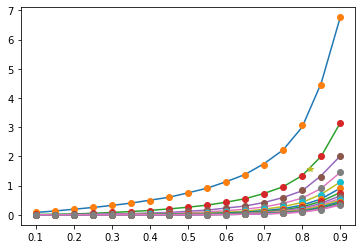

In [14]:
for j in nr_of_servers:
    # Create a 6th order polynomial fit through the data (for nr_of_stations_chk)
    target = df.loc[:, j]
    p_p = np.polyfit(target.index, target.values, poly_order)

    plt.plot(utilisations, target)
    waiting_factors = []
    for i in utilisations:
        waiting_factors.append(np.polyval(p_p, i))

    plt.plot(utilisations, waiting_factors, 'o')
plt.plot(.82, factor,'*')
